In [170]:
import uproot
import pandas

In [582]:
def prepareDataset(dataset, chan, drop=[]):
    df = dataset[chan]["ntuple"].pandas.df(["jetPt", "nJets", "jetEta", "Mass", 
                                            "MTWZ", "mjj", "Eta", "MET", "jetPhi", "etajj"], flatten=False)
    filtered_df = df[(df["nJets"] >= 2.) & (df["mjj"] > 100.)].copy()
    filtered_df["ptj1"] = filtered_df["jetPt"].str[0]
    filtered_df["ptj2"] = filtered_df["jetPt"].str[1]
    filtered_df["phij1"] = filtered_df["jetPhi"].str[0]
    filtered_df["phij2"] = filtered_df["jetPhi"].str[1]
    filtered_df["etaj1"] = filtered_df["jetEta"].str[0]
    filtered_df["etaj2"] = filtered_df["jetEta"].str[1]
    filtered_df["dEtajj"] = filtered_df["etaj1"] - filtered_df["etaj2"]
    filtered_df["dPhijj"] = filtered_df["phij1"] - filtered_df["phij2"]
    filtered_df["etas3l"] = filtered_df["Eta"] - 0.5*(filtered_df["etaj1"] + filtered_df["etaj2"])
    filtered_df["zep3l"] = filtered_df["etas3l"]/filtered_df["dEtajj"]
    filtered_df = filtered_df.drop(["jetEta", "jetPt", "jetPhi"], axis=1)
    #default_drop = ["Mass", "MtToMET", "type1_pfMETEt", "nJets", "Eta"]
    default_drop = ["MtToMET", "nJets", "Eta", "etajj"]
    drop.extend(default_drop)
    filtered_df = filtered_df.drop(drop, axis=1)
    return filtered_df

In [609]:
def eventsProcessed(dataset):
    df = dataset["metaInfo"]["metaInfo"].pandas.df()
    return sum(df["summedWeights"])

In [583]:
qcdwz_file = uproot.open("Data/2018-04-29-wz3lnu-powheg/combined.root")
ewwz_file = uproot.open("Data/2018-04-29-wlljj-ewk-WZxsec2016-3MediumLeptonsNoVetoToWselection-v1/combined.root")
ew_df = pandas.DataFrame()
qcd_df = pandas.DataFrame()
for chan in ["eee", "eem", "emm", "mmm"]:
    ew_df = pandas.concat([ew_df, prepareDataset(ewwz_file, chan)])
    qcd_df = pandas.concat([qcd_df, prepareDataset(qcdwz_file, chan)])

[]

In [584]:
qcd_df["isSignal"] = -1
qcd_df

,Mass,mjj,type1_pfMETEt,ptj1,ptj2,phij1,phij2,etaj1,etaj2,dEtajj,dPhijj,etas3l,zep3l,isSignal
entry,,,,,,,,,,,,,,
7,197.474213,1452.079590,56.381241,289.282349,90.630432,-0.400510,2.962561,-1.126147,3.234876,-4.361023,-3.363071,-1.854179,0.425171,-1
9,187.145844,538.557129,77.485161,104.530663,53.914455,2.947114,-2.388021,1.259367,-2.700934,3.960301,5.335135,1.722005,0.434817,-1
21,147.425415,166.633636,42.591873,59.698605,36.747917,-2.092060,0.094505,1.257995,3.679656,-2.421661,-2.186565,0.145901,-0.060248,-1
22,154.552063,248.347427,144.693771,270.434143,85.779564,-2.486557,1.944349,-0.087381,-0.261261,0.173881,-4.430906,0.928196,5.338115,-1
35,155.078537,1854.938965,65.275612,130.573730,111.357719,-3.101528,2.852166,-3.381214,2.092694,-5.473908,-5.953694,1.231963,-0.225061,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184338,126.538589,302.836609,36.802418,86.039040,30.506975,3.018838,-0.344050,1.076493,-2.413027,3.489520,3.362889,2.485109,0.712164,-1
184343,126.448036,396.767975,85.008743,143.450394,33.921539,0.267259,2.624281,-0.282596,-3.680607,3.398010,-2.357022,3.352751,0.986681,-1
184349,661.758911,1305.660278,71.650558,319.437012,44.154739,-0.720459,0.713821,-1.928186,2.867761,-4.795947,-1.434279,0.256921,-0.053570,-1


In [585]:
ew_df["isSignal"] = 1
ew_df

,Mass,mjj,type1_pfMETEt,ptj1,ptj2,phij1,phij2,etaj1,etaj2,dEtajj,dPhijj,etas3l,zep3l,isSignal
entry,,,,,,,,,,,,,,
1,231.138519,744.512634,70.754158,244.329880,70.080750,-0.952728,1.927766,0.964082,-2.448253,3.412335,-2.880494,0.437715,0.128274,1
2,346.155365,1094.974487,102.971786,116.069794,36.278889,2.033741,-0.081956,3.470814,-2.176313,5.647127,2.115696,1.624409,0.287652,1
3,264.256012,566.254272,95.062729,362.949463,43.012203,1.237676,2.603570,-2.759324,0.269961,-3.029285,-1.365894,2.051357,-0.677175,1
4,288.859344,102.392677,42.641720,275.542755,94.206352,3.128165,2.550772,-2.399656,-2.497308,0.097651,0.577392,2.547055,26.083177,1
5,130.684494,1426.736206,255.066833,254.638641,56.844784,0.322746,-0.778865,1.564925,-3.387091,4.952016,1.101611,1.663050,0.335833,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38931,549.119568,665.170044,67.633163,492.240631,148.574539,2.771630,0.224134,-0.191494,1.224140,-1.415634,2.547495,-0.864858,0.610934,1
38932,143.280563,549.855103,79.507683,397.701080,94.984352,0.455766,-3.040766,-0.545479,1.218699,-1.764178,3.496532,-1.048760,0.594475,1
38934,280.429840,1536.218506,109.654442,127.344757,71.345322,-0.883576,-2.591212,1.629912,-3.927989,5.557900,1.707636,3.057300,0.550082,1


In [586]:
full_df = pandas.concat([ew_df, qcd_df], sort=False)
truth_df = full_df["isSignal"]
train_full_df = full_df.drop(["isSignal"], axis=1)
full_df

,Mass,mjj,type1_pfMETEt,ptj1,ptj2,phij1,phij2,etaj1,etaj2,dEtajj,dPhijj,etas3l,zep3l,isSignal
entry,,,,,,,,,,,,,,
1,231.138519,744.512634,70.754158,244.329880,70.080750,-0.952728,1.927766,0.964082,-2.448253,3.412335,-2.880494,0.437715,0.128274,1
2,346.155365,1094.974487,102.971786,116.069794,36.278889,2.033741,-0.081956,3.470814,-2.176313,5.647127,2.115696,1.624409,0.287652,1
3,264.256012,566.254272,95.062729,362.949463,43.012203,1.237676,2.603570,-2.759324,0.269961,-3.029285,-1.365894,2.051357,-0.677175,1
4,288.859344,102.392677,42.641720,275.542755,94.206352,3.128165,2.550772,-2.399656,-2.497308,0.097651,0.577392,2.547055,26.083177,1
5,130.684494,1426.736206,255.066833,254.638641,56.844784,0.322746,-0.778865,1.564925,-3.387091,4.952016,1.101611,1.663050,0.335833,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184338,126.538589,302.836609,36.802418,86.039040,30.506975,3.018838,-0.344050,1.076493,-2.413027,3.489520,3.362889,2.485109,0.712164,-1
184343,126.448036,396.767975,85.008743,143.450394,33.921539,0.267259,2.624281,-0.282596,-3.680607,3.398010,-2.357022,3.352751,0.986681,-1
184349,661.758911,1305.660278,71.650558,319.437012,44.154739,-0.720459,0.713821,-1.928186,2.867761,-4.795947,-1.434279,0.256921,-0.053570,-1


In [587]:
from sklearn.model_selection import train_test_split
testsize=0.5
X_train, X_test, y_train, y_test = train_test_split(full_df, truth_df, test_size=testsize, random_state=42)
X_test_ew = X_test[X_test["isSignal"] > 0]
X_test_qcd = X_test[X_test["isSignal"] < 0]
X_train = X_train.drop(["isSignal"], axis=1)
X_test = X_test.drop(["isSignal"], axis=1)
X_test_qcd = X_test_qcd.drop(["isSignal"], axis=1)
X_test_ew = X_test_ew.drop(["isSignal"], axis=1)

In [178]:
import xgboost as xgb

,mjj,ptj1,ptj2,phij1,phij2,etaj1,etaj2,dEtajj,dPhijj,etas3l,zep3l
entry,,,,,,,,,,,
1956,369.930267,274.933533,245.859390,-2.018961,-1.153596,-1.552221,0.845518,-2.397738,-0.865365,0.007252,-0.003024
16420,1619.508423,530.581055,211.206116,-1.667776,-2.422265,-1.043562,2.893902,-3.937464,0.754489,0.150207,-0.038148
13988,230.545197,89.523521,69.918022,0.484928,-2.223410,2.584542,3.318141,-0.733600,2.708339,-1.485883,2.025468
16062,2751.347412,596.682495,389.501404,0.890758,-1.960885,1.472539,-1.598294,3.070833,2.851643,-0.783240,-0.255058
37589,3315.580078,283.880951,184.758148,-0.962210,1.679076,-2.136457,-0.514513,-1.621943,-2.641286,0.066472,-0.040983
...,...,...,...,...,...,...,...,...,...,...,...
7719,906.568237,206.050537,119.012810,-0.554640,-3.082787,-2.503668,-0.210203,-2.293465,2.528147,2.283563,-0.995683
32112,1339.464478,365.374298,229.836914,-0.306225,-1.554461,-1.161640,-1.867742,0.706102,1.248236,2.642297,3.742091
17114,960.510559,344.379059,158.509491,-0.097564,1.787216,0.597945,-1.977224,2.575169,-1.884780,1.390014,0.539776


In [588]:
mod = xgb.XGBRegressor(
    gamma=1,                 
    learning_rate=0.01,
    max_depth=8,
    n_estimators=800,                                                                    
    min_samples_leaf=800
)

In [369]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
mod = AdaBoostRegressor(
    learning_rate=0.01,
    n_estimators=10000
)

In [589]:
mod.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:11:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=8, min_child_weight=1, min_samples_leaf=800,
             missing=None, n_estimators=800, n_jobs=1, nthread=None,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=None, subsample=1,
             verbosity=1)

In [590]:
predictions_ew = mod.predict(X_test_ew)
predictions_qcd = mod.predict(X_test_qcd)
print(len(predictions_ew))
print(len(predictions_qcd))

46353
46124


In [591]:
predictions = mod.predict(X_test)
len(predictions)

92477

In [342]:
import matplotlib.pyplot as plt

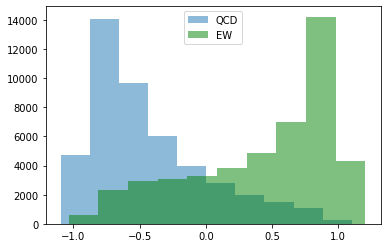

In [592]:
plt.hist(predictions_qcd,alpha=0.5, label='QCD')
plt.hist(predictions_ew,color='g', alpha=0.5,label='EW')
plt.legend()

In [265]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
import numpy

In [593]:
cutoff = 0.0
cat_predict = [1 if x > cutoff else -1 for x in predictions] 
print("Roc score is", roc_auc_score(cat_predict, y_test))

Roc score is 0.7999682157110346


In [594]:
tn, fp, fn, tp = confusion_matrix(cat_predict, y_test).ravel()
print(confusion_matrix(cat_predict, y_test))
tot_qcd = len(predictions_qcd)
print("\nTotal QCD", tot_qcd)
print("-------------------------------")
print("QCD as QCD", tn, "(%0.02f percent)" % (tn/tot_qcd*100))
print("QCD as EW", fp, "(%0.02f percent)" % (fp/tot_qcd*100))

tot_ew = len(predictions_ew)
print("\nTotal EW", tot_ew)
print("-------------------------------")
print("EW as QCD", fn, "(%0.02f percent)" % (fn/tot_ew*100))
print("EW as EW", tp, "(%0.02f percent)" % (tp/tot_ew*100))
print("-------------------------------")
print("Overall accuracy", accuracy_score(cat_predict, y_test))

[[38412 10918]
 [ 7712 35435]]

Total QCD 46124
-------------------------------
QCD as QCD 38412 (83.28 percent)
QCD as EW 10918 (23.67 percent)

Total EW 46353
-------------------------------
EW as QCD 7712 (16.64 percent)
EW as EW 35435 (76.45 percent)
-------------------------------
Overall accuracy 0.7985445029574921


In [595]:
cutoff = 0.5
print("Rate of acceptance")
acc_rate_sig = len([x for x in filter(lambda x: x > cutoff, predictions_ew)])/eventsProcessed(ewwz_file)
acc_rate_bkgd = len([x for x in filter(lambda x: x > cutoff, predictions_qcd)])/eventsProcessed(qcdwz_file)
#acc_bkgd = testqcd_emm_wtruth[testqcd_emm_wtruth["prediction"] > 0.9]
print("Signal", acc_rate_sig)
print("Background", acc_rate_bkgd)

Rate of acceptance
Signal 0.026298
Background 0.002395


In [596]:
print("Scaled by cross section and 36 fb-1")
print("Signal", acc_rate_sig*17.5*36)
print("Background", acc_rate_bkgd*4.43*1000*36)

Scaled by cross section and 36 fb-1
Signal 16.56774
Background 381.9545999999999


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


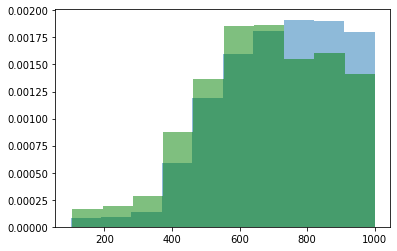

In [598]:
X_test_ew["predict"] = predictions_ew
X_test_qcd["predict"] = predictions_qcd
ewklike = X_test_ew[(X_test_ew["predict"] > 0.5) & (X_test_ew["mjj"] < 1000)]
ewklike_qcd = X_test_qcd[(X_test_qcd["predict"] > 0.5) & (X_test_qcd["mjj"] < 1000)]
plt.hist(ewklike["mjj"],alpha=0.5, label='EW', normed=True)
plt.hist(ewklike_qcd["mjj"],color='g', alpha=0.5,label='EW', normed=True)
plt.show()

In [516]:
import numpy as np

In [696]:
ewhist, bins = np.histogram(predictions_ew, bins=[0, 0.5, 0.7, 0.8, 0.85, 0.90, 0.95, 1.05, 2])
qcdhist, bins = np.histogram(predictions_qcd, bins=[0, 0.5, 0.7, 0.8, 0.85, 0.90, 0.95, 1.05, 2])
ewhist = ewhist*17.6*36/eventsProcessed(ewwz_file)
qcdhist = qcdhist*4430*36/eventsProcessed(qcdwz_file)
print(ewhist)
print(qcdhist)
print(17.6*36/eventsProcessed(ewwz_file))
print(4430*36/eventsProcessed(qcdwz_file))

[5.7892032 3.5779392 2.5210944 1.6232832 2.0826432 2.4843456 4.2210432
 0.152064 ]
[4.29068477e+01 9.99841722e+00 4.22854772e+00 1.71885623e+00
 1.71885623e+00 1.01678819e+00 6.21370562e-01 2.42092427e-02]
0.0006336
0.008069747554736955


7
8


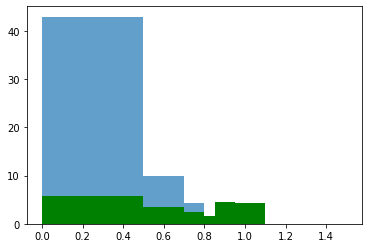

In [692]:
plt.hist(bins[:-1], weights=qcdhist, bins=bins, alpha=0.7)
plt.hist(bins[:-1], weights=ewhist, bins=bins,color='g')
print(len(ewhist))
print(len(bins))

In [666]:
ew_processed = eventsProcessed(ewwz_file)
qcd_processed = eventsProcessed(qcdwz_file)
print(len(ew_df))
print(len(ew_df[(ew_df.mjj > 500) & (abs(ew_df.dEtajj) > 2.5)]))
print(len(ew_df[(ew_df.mjj > 500) & (abs(ew_df.dEtajj) > 2.5)])/ew_processed*17.6*36)

print("\n", len(qcd_df))
print(len(qcd_df[(qcd_df.mjj > 500) & (abs(qcd_df.dEtajj) > 2.5)]))
print(len(qcd_df[(qcd_df.mjj > 500) & (abs(qcd_df.dEtajj) > 2.5)])/qcd_processed*4300*36)

92828
54953
34.818220800000006

 92126
14271
111.78385544485317


In [602]:
qcd_processed

1000000.0

In [628]:
import math
def approxLikelihood(sig_hist, bkgd_hist):
    term1 = 0
    term2 = 0
    for sig, bkgd in zip(sig_hist, bkgd_hist):
        term1 += (sig+bkgd)*math.log(1+sig/bkgd)
        term2 += sig
    return math.sqrt(2*(term1 - term2))

In [695]:
print(approxLikelihood(ewhist, qcdhist))

4.515165493120751


In [672]:
ew_loose = ew_df[(ew_df.mjj > 500) & (abs(ew_df.dEtajj) > 2.5)]
qcd_loose = qcd_df[(qcd_df.mjj > 500) & (abs(qcd_df.dEtajj) > 2.5)]
ew_mjj_hist,bins = numpy.histogram(ew_loose["mjj"], bins=[500,750,1000, 1250, 1500, 2000, 10000])
qcd_mjj_hist,bins = numpy.histogram(qcd_loose["mjj"], bins=[500,750,1000, 1250, 1500, 2000, 10000])
ew_mjj_hist = ew_mjj_hist*17.6*36/eventsProcessed(ewwz_file)
qcd_mjj_hist = qcd_mjj_hist*4300*36/eventsProcessed(qcdwz_file)

(array([6.8751936, 6.266304 , 5.1410304, 4.0746816, 5.4540288, 7.0063488]),
 array([  500,   750,  1000,  1250,  1500,  2000, 10000]),
 <a list of 6 Patch objects>)

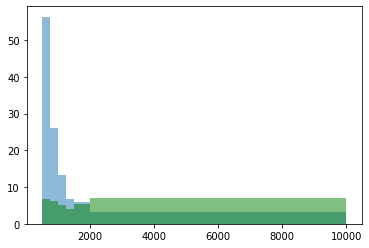

In [673]:
plt.hist(bins[:-1], weights=qcd_mjj_hist, bins=bins, alpha=0.5)
plt.hist(bins[:-1], weights=ew_mjj_hist, bins=bins, alpha=0.5, color='g')

In [678]:
print(approxLikelihood(ew_mjj_hist, qcd_mjj_hist))

4.438671382301406
